In [1]:
#os, numpy and pandas for 
import os
import numpy as np
import pandas as pd

#pillow will be used for image manipulation
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

#xml required to parse annotation files
import xml.etree.ElementTree as ET

# Data Exploration

In [2]:
img_dir = ".\images"
anno_dir = r".\annotations"

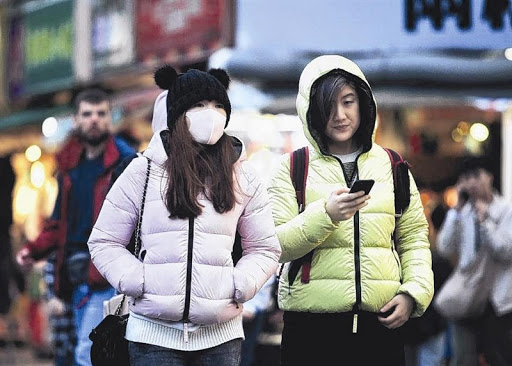

In [3]:
sample_image = Image.open(".\images\maksssksksss0.png")
sample_image

In [4]:
with open(r".\annotations\maksssksksss0.xml","r") as an_file:
    print("".join(an_file.readlines()))


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

In [5]:
ANNO_DF = pd.DataFrame()

for file in os.listdir(anno_dir):
    path = f"{anno_dir}\{file}"
    tree = ET.parse(path)
    file_name=file.split(".")
    file_name=file_name[0]
    
    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))    

        if 'object' in elem.tag:
            for attr in list(elem):

                if 'name' in attr.tag:
                    name = attr.text                 
                     

                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            
                            ANNO_DF=ANNO_DF.append({
                                "file":file_name,
                                "mask":name,
                                "width":width,
                                "height":height,
                                "xmin":xmin,
                                "ymin":ymin,
                                "xmax":xmax,
                                "ymax":ymax
                            },ignore_index=True)

In [6]:
ANNO_DF

,file,mask,width,height,xmin,ymin,xmax,ymax
0,maksssksksss0,without_mask,512.0,366.0,79.0,105.0,109.0,142.0
1,maksssksksss0,with_mask,512.0,366.0,185.0,100.0,226.0,144.0
2,maksssksksss0,without_mask,512.0,366.0,325.0,90.0,360.0,141.0
3,maksssksksss1,with_mask,400.0,156.0,321.0,34.0,354.0,69.0
4,maksssksksss1,with_mask,400.0,156.0,224.0,38.0,261.0,73.0
...,...,...,...,...,...,...,...,...
4067,maksssksksss98,with_mask,400.0,267.0,263.0,62.0,287.0,85.0
4068,maksssksksss98,with_mask,400.0,267.0,344.0,80.0,377.0,106.0
4069,maksssksksss99,mask_weared_incorrect,400.0,267.0,181.0,54.0,273.0,162.0
4070,maksssksksss99,with_mask,400.0,267.0,99.0,87.0,176.0,165.0


In [7]:
#determine mean sizes of mask boxes for a rough common size

ANNO_DF["xD"]=ANNO_DF["xmax"]-ANNO_DF["xmin"]
ANNO_DF["yD"]=ANNO_DF["ymax"]-ANNO_DF["ymin"]

print(ANNO_DF.xD.mean())
print(ANNO_DF.yD.mean())

31.149066797642437
35.0049115913556


In [8]:
file_list=ANNO_DF["file"].unique()

In [18]:
def draw_boxes(f):
    active_img=Image.open(f".\images\{f}.png")
    img_bbox = ImageDraw.Draw(active_img)
    
    for i in ANNO_DF[ANNO_DF["file"]==f"{f}"].index:    
        xmin=ANNO_DF.loc[i,"xmin"]
        ymin=ANNO_DF.loc[i,"ymin"]
        xmax=ANNO_DF.loc[i,"xmax"]
        ymax=ANNO_DF.loc[i,"ymax"]

        if ANNO_DF.loc[i,"mask"]=="without_mask":
            colour="red"
        elif ANNO_DF.loc[i,"mask"]=="mask_weared_incorrect":
            colour="orange"
        else:
            colour="green"
        
        img_bbox.rectangle([xmin,ymin,xmax,ymax],outline=colour)
        
    return active_img

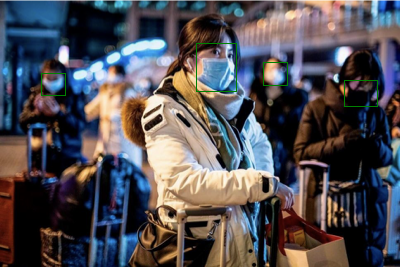

In [20]:
draw_boxes(f=file_list[-2])

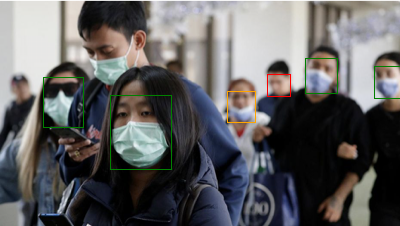

In [21]:
draw_boxes(f=file_list[-6])

In [12]:
ANNO_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   file    4072 non-null   object 
 1   mask    4072 non-null   object 
 2   width   4072 non-null   float64
 3   height  4072 non-null   float64
 4   xmin    4072 non-null   float64
 5   ymin    4072 non-null   float64
 6   xmax    4072 non-null   float64
 7   ymax    4072 non-null   float64
 8   xD      4072 non-null   float64
 9   yD      4072 non-null   float64
dtypes: float64(8), object(2)
memory usage: 318.2+ KB


In [14]:
ANNO_DF.describe()

,width,height,xmin,ymin,xmax,ymax,xD,yD
count,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000
mean,393.702849,270.123772,182.207024,85.780697,213.356090,120.785609,31.149067,35.004912
std,35.411593,52.340433,104.471254,52.571821,102.712267,70.355098,27.959214,32.635004
min,193.000000,156.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000
25%,400.000000,226.000000,96.000000,49.000000,134.000000,73.000000,14.000000,16.000000
50%,400.000000,267.000000,177.000000,75.000000,212.000000,103.000000,22.000000,24.000000
75%,400.000000,281.000000,266.000000,113.000000,292.000000,148.000000,36.000000,40.000000
max,600.000000,600.000000,569.000000,330.000000,592.000000,495.000000,317.000000,340.000000


In [22]:
os.listdir("data")

['0_0.png',
 '1000_2.png',
 '1001_2.png',
 '1002_2.png',
 '1003_2.png',
 '1004_1.png',
 '1005_2.png',
 '1006_2.png',
 '1007_2.png',
 '1008_2.png',
 '1009_2.png',
 '100_0.png',
 '1010_2.png',
 '1011_2.png',
 '1012_2.png',
 '1013_2.png',
 '1014_2.png',
 '1015_2.png',
 '1016_2.png',
 '1017_2.png',
 '1018_2.png',
 '1019_2.png',
 '101_1.png',
 '1020_2.png',
 '1021_2.png',
 '1022_0.png',
 '1023_0.png',
 '1024_2.png',
 '1025_1.png',
 '1026_1.png',
 '1027_2.png',
 '1028_2.png',
 '1029_2.png',
 '102_2.png',
 '1030_2.png',
 '1031_2.png',
 '1032_2.png',
 '1033_2.png',
 '1034_2.png',
 '1035_2.png',
 '1036_2.png',
 '1037_2.png',
 '1038_2.png',
 '1039_2.png',
 '103_2.png',
 '1040_2.png',
 '1041_2.png',
 '1042_2.png',
 '1043_2.png',
 '1044_2.png',
 '1045_2.png',
 '1046_0.png',
 '1047_0.png',
 '1048_0.png',
 '1049_2.png',
 '104_2.png',
 '1050_2.png',
 '1051_2.png',
 '1052_0.png',
 '1053_0.png',
 '1054_2.png',
 '1055_0.png',
 '1056_2.png',
 '1057_0.png',
 '1058_2.png',
 '1059_0.png',
 '105_0.png',
 '10